In [ ]:
import numpy as np
import matplotlib.pyplot as plt

**1. Generate 20 real number for the variable X from the uniform distribution U[0,1]**<br>


In [ ]:
np.random.uniform(0.0, 1.0, 20)

array([0.7781716 , 0.84423496, 0.1390727 , 0.42690436, 0.84285489,
       0.81803331, 0.10241376, 0.15638335, 0.30419869, 0.07535907,
       0.424663  , 0.10761771, 0.56821759, 0.24655694, 0.59643307,
       0.11752564, 0.97588387, 0.9325612 , 0.39179694, 0.24217859])

**2. Construct the training set T = { (x 1 ,y 1 ),(x 2 ,y 2 ),……,(x 20 ,y 20 )} using the relation Yi = sin(2 π x i ) + ϵ i where ϵ i ~ N(0,0.25)**<br>

In [ ]:
np.random.seed(0)

x_train = np.random.uniform(0.0, 1.0, 20).reshape(20,1)
x_train

ep=np.random.normal(loc=0.0, scale =0.25, size =20) # eplsilon

y_train =[np.sin(2*np.pi*x_train[i])+ ep[i] for i in range(20)]
y_train = np.array(y_train).reshape(20,1)
y_train

train_set = np.c_[ x_train, y_train ]
train_set

array([[ 0.5488135 ,  0.0716014 ],
       [ 0.71518937, -1.02746519],
       [ 0.60276338, -0.52347583],
       [ 0.54488318, -0.49181013],
       [ 0.4236548 , -0.17674234],
       [ 0.64589411, -0.63018111],
       [ 0.43758721,  0.59828617],
       [ 0.891773  , -0.81434228],
       [ 0.96366276,  0.34110344],
       [ 0.38344152,  0.30503388],
       [ 0.79172504, -0.95439121],
       [ 0.52889492, -0.22735238],
       [ 0.56804456, -0.03143558],
       [ 0.92559664, -0.08330743],
       [ 0.07103606,  0.47039728],
       [ 0.0871293 ,  0.61505183],
       [ 0.0202184 , -0.09525191],
       [ 0.83261985, -1.3634573 ],
       [ 0.77815675, -1.07136951],
       [ 0.87001215, -0.68982913]])


**3. In the similar way construct a testing set of size 50
I,e. Test = { (x’ 1 ,y’ 1 ),(x’ 2 ,y’ 2 ),……,(x’ 50 ,y’ 50 )}**

In [ ]:
x_test = np.random.uniform(0.0, 1.0, 50).reshape(50,1)
x_test

ep=np.random.normal(loc=0.0, scale =0.25, size =50) # eplsilon

y_test =[np.sin(2*np.pi*x_test[i])+ ep[i] for i in range(50)]
y_test = np.array(y_test).reshape(50,1)
y_test

train_set = np.c_[ x_train, y_train ]
train_set

array([[ 0.5488135 ,  0.0716014 ],
       [ 0.71518937, -1.02746519],
       [ 0.60276338, -0.52347583],
       [ 0.54488318, -0.49181013],
       [ 0.4236548 , -0.17674234],
       [ 0.64589411, -0.63018111],
       [ 0.43758721,  0.59828617],
       [ 0.891773  , -0.81434228],
       [ 0.96366276,  0.34110344],
       [ 0.38344152,  0.30503388],
       [ 0.79172504, -0.95439121],
       [ 0.52889492, -0.22735238],
       [ 0.56804456, -0.03143558],
       [ 0.92559664, -0.08330743],
       [ 0.07103606,  0.47039728],
       [ 0.0871293 ,  0.61505183],
       [ 0.0202184 , -0.09525191],
       [ 0.83261985, -1.3634573 ],
       [ 0.77815675, -1.07136951],
       [ 0.87001215, -0.68982913]])

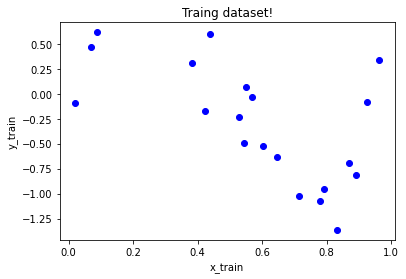

In [ ]:
# Plotting training dataset

plt.scatter(x_train, y_train, color= "blue")
# x-axis label
plt.xlabel('x_train')
# frequency label
plt.ylabel('y_train')
# plot title
plt.title('Traing dataset!')
 
# function to show the plot
plt.show()

**4. Estimate the regularized Least Square polynomial regression model of order M= 1,2, 3,9, using the training set T.**

**For example for M=1 ,we need to estimate**

`F(x) = β1 x + β0`

**For M = 2**

`F(x) = β2 x^2 + β1 x + β0` . 



In [ ]:
def RMSE_fun(y, y_hat):
  
    #Calculating loss
    rmse = np.sqrt(np.mean((y_hat - y)**2))
    return rmse

def add_higher_degree_col(X, degrees):
  X_ = X.copy()
    
  # Appending columns of higher degrees to input matrix X
  for i in range(2,degrees+1):
      X = np.append(X, X_**i, axis=1)

  return X

def find_theta(X, y, lamda, degrees):
    
    m = X.shape[0] # num of training samples

    X = add_higher_degree_col(X, degrees)

    # Appending a col of ones in X to add the bias
    X = np.append(X, np.ones((m,1)), axis=1)

    # reshaping y to (m,1)
    y = y.reshape(m,1)
    
    # Normal Equation
    I = np.eye(np.size(X, 1))
    theta = np.linalg.pinv( (X.T @ X) + (lamda * I ) ) @ X.T @ y 
    
    return X, theta


In [ ]:
X1, theta1 = find_theta(x_train, y_train, lamda=0.001,degrees =1)
X2, theta2 = find_theta(x_train, y_train, 0.001, degrees =2)
X3, theta3 = find_theta(x_train, y_train, 0.001, degrees =3)
X9, theta9 = find_theta(x_train, y_train, 0.001, degrees =9)

**5. List the value of coefficients of estimated polynomial regression models for each case.**

In [ ]:
print("Coefficients for M=1 \n",theta1)

print("Coefficients for M=2\n",theta2)

print("Coefficients for M=3\n",theta3)

print("Coefficients for M=9\n",theta9)

Coefficients for M=1 
 [[-1.22967721]
 [ 0.42615654]]
Coefficients for M=2
 [[-1.94262256]
 [ 0.71895469]
 [ 0.54287926]]
Coefficients for M=3
 [[  6.38563403]
 [-21.17219938]
 [ 14.77237639]
 [  0.09429671]]
Coefficients for M=9
 [[ 2.84547738]
 [-5.16046338]
 [-2.53576271]
 [-0.68926676]
 [ 0.46114638]
 [ 1.22772981]
 [ 1.67443579]
 [ 1.80791133]
 [ 1.64732415]
 [ 0.16263719]]


 **6. compute the RMSE for polynomial regression models for order M =1,2,3 and 9.**

In [ ]:
def predict(X , y, theta, lamda,degrees):
    
    X = add_higher_degree_col(X, degrees)
    
    # Appending a col of ones in X to add the bias
    X = np.append(X, np.ones((X.shape[0],1)), axis=1)
    
    y_hat = np.dot(X, theta) 
    #+ lamda * np.norm(theta)
    
    rmse = RMSE_fun(y, y_hat)
    return y_hat,rmse

preds1,RMSE1 = predict(x_test, y_test, theta1, 0.001, degrees =1)
preds2,RMSE2 = predict(x_test,y_test, theta2, 0.001, degrees =2)
preds3,RMSE3 = predict(x_test,y_test, theta3, 0.001, degrees =3)
preds9,RMSE9 = predict(x_test,y_test, theta9, 0.001, degrees =9)

print("RMSE for M=1 \n",RMSE1)

print("RMSE for M=2\n",RMSE2)

print("RMSE for M=3\n",RMSE3)

print("RMSE for M=9\n",RMSE9)

RMSE for M=1 
 0.6802256695631386
RMSE for M=2
 0.6796594800109493
RMSE for M=3
 0.4123736053099466
RMSE for M=9
 0.51306716682083


**7. Plot the estimate obtained by polynomial regression models for order M=1,2,3 and 9 for training set along with y 1, y 2, , y 50. . Also plot our actual mean estiamte E(Y/X) = sin(2 π x i ) .** 

In [ ]:
y_train_new =[np.sin(2*np.pi*x_train[i]) for i in range(20)]
y_train_new = np.array(y_train_new)

In [ ]:
def plot_graph(x,y,y_new, noOfsamples, theta, degrees):
  y_hat, rmse = predict(x,y, theta, 0.001, degrees) #.reshape(noOfsamples,1)

  fig = plt.figure(figsize=(8,6))

  #y with epsilon 
  plt.plot(x, y, 'b.')

  #y without epsilon 
  a,b = zip(*sorted(zip(x, y_new)))
  plt.plot(a, b, 'y')

  #prediction
  xs, ys = zip(*sorted(zip(x, y_hat)))

  plt.plot(xs,ys,'g')
  plt.legend(["Actual y", "Actual y with noise","Polynomial predictions"])
  plt.xlabel('X - Input')
  plt.ylabel('y - target / true')
  plt.title('Prediction on Test dataset for M :'+str(degrees))
  plt.show()

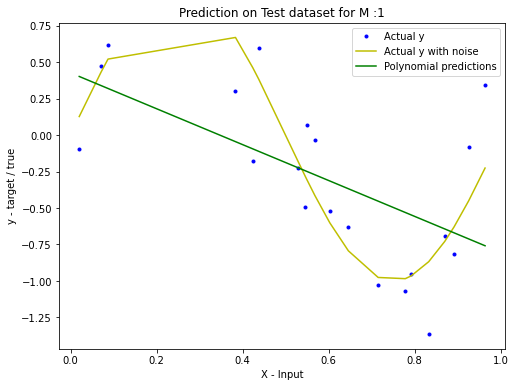

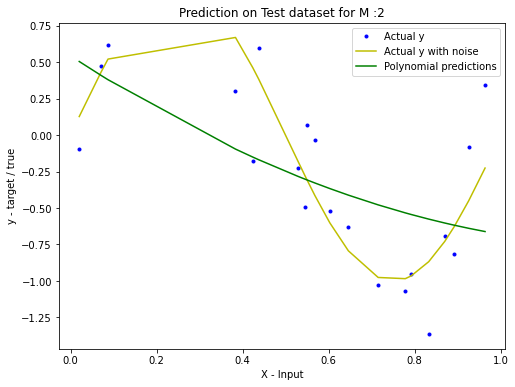

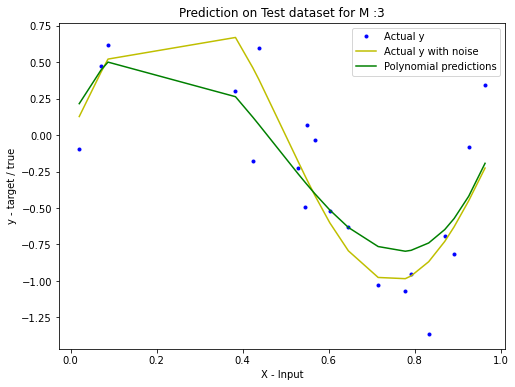

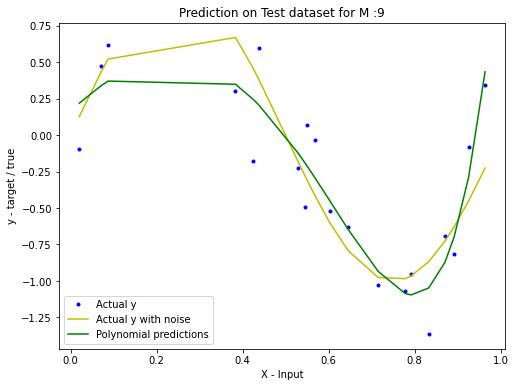

In [ ]:
plot_graph(x_train, y_train, y_train_new,20,theta1,1)
plot_graph(x_train, y_train, y_train_new,20,theta2,2)
plot_graph(x_train, y_train, y_train_new,20,theta3,3)
plot_graph(x_train, y_train, y_train_new,20,theta9,9)

**8. Plot the estimate obtained by polynomial regression models for order M=1,2,3 and 9 for testing set along with y’ 1, y’ 2, , y’ 50. . Also plot the sin(2πx’ i ) .**

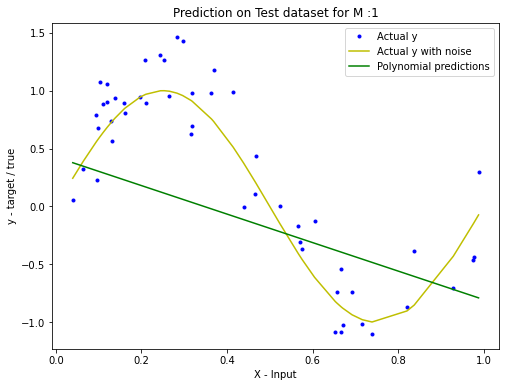

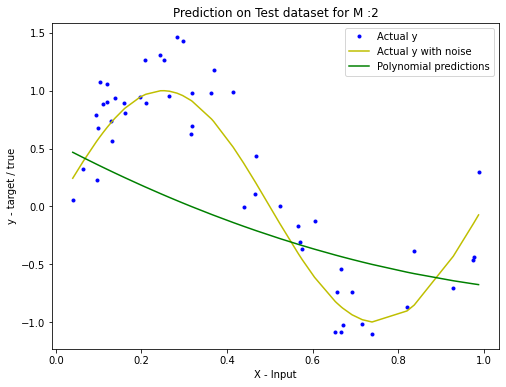

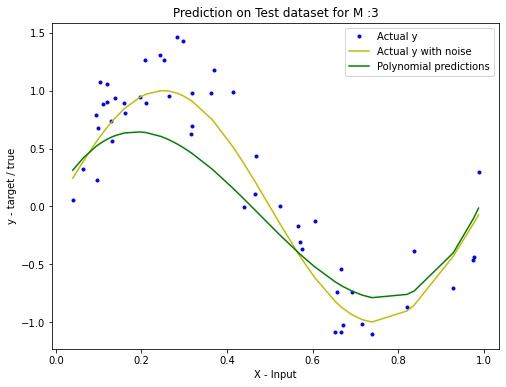

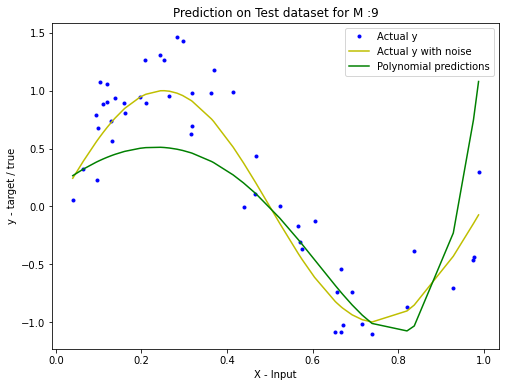

In [ ]:
y_test_new =[np.sin(2*np.pi*x_test[i]) for i in range(50)]
y_test_new = np.array(y_test_new)

plot_graph(x_test, y_test, y_test_new,50,theta1,1)
plot_graph(x_test, y_test, y_test_new,50,theta2,2)
plot_graph(x_test, y_test, y_test_new,50,theta3,3)
plot_graph(x_test, y_test, y_test_new,50,theta9,9)

**8. Study the effect of regularization parameter λ on testing RMSE and
flexibility of curve and list your observations.**

From differen values of lamda its been observed that overfitting will be reduce as we increase value of lamda because we giveing panelty to high value of weights.

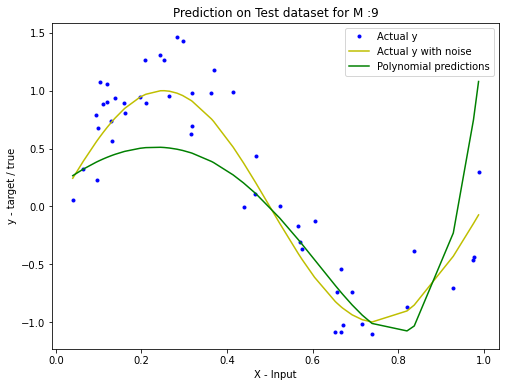

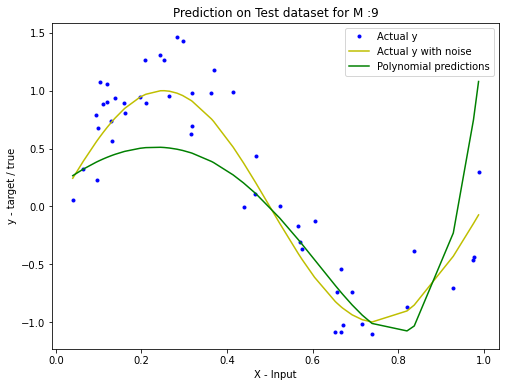

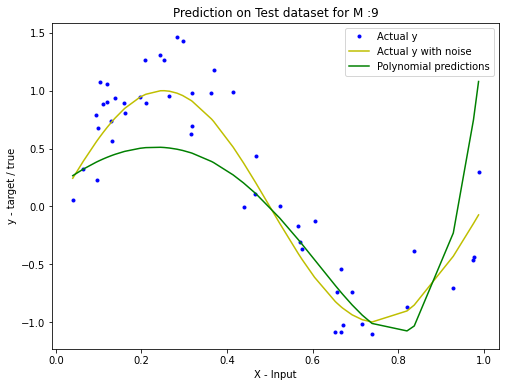

In [ ]:
def different_lamda(x,y,y_new, theta, degrees,lamda):
  y_hat, rmse = predict(x,y, theta, 0.001, degrees) #.reshape(noOfsamples,1)

  fig = plt.figure(figsize=(8,6))

  #y with epsilon 
  plt.plot(x, y, 'b.')

  #y without epsilon 
  a,b = zip(*sorted(zip(x, y_new)))
  plt.plot(a, b, 'y')

  #prediction
  xs, ys = zip(*sorted(zip(x, y_hat)))

  plt.plot(xs,ys,'g')
  plt.legend(["Actual y", "Actual y with noise","Polynomial predictions"])
  plt.xlabel('X - Input')
  plt.ylabel('y - target / true')
  plt.title('Prediction on Test dataset for M :'+str(degrees))
  plt.show()

for lamda in [0.1, 0.00001,0.00000001]:
  different_lamda(x_test, y_test, y_test_new,theta9,9,lamda)

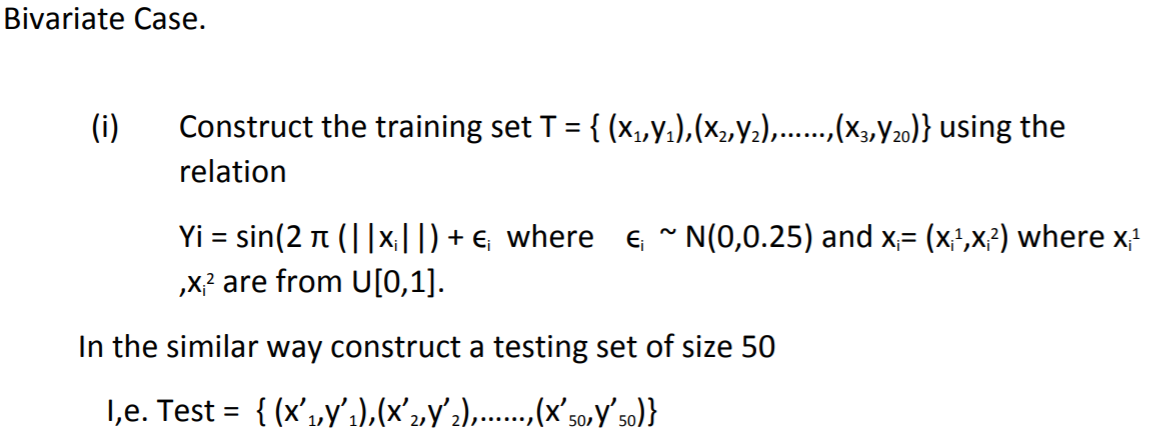

In [ ]:
np.random.seed(0)

x = x_train
x =np.sort(x)
x2 = np.random.uniform(0.0, 1.0, 20).reshape(20,1)#np.random.uniform(0.0, 1.0, 40).reshape(20,2)
x2=np.sort(x2)
x_train2 = np.c_[ x, x2 ]

ep = np.random.normal(loc=0.0, scale =0.25, size =20) # eplsilon

yy = [np.sin(2*np.pi*np.linalg.norm(x_train2[i]))+ ep[i] for i in range(20)]
yy = np.array(yy).reshape(20,1)

train_set2 = np.c_[ x_train2, yy ]

X1 = x_test
X2 = np.random.uniform(0.0, 1.0, 100).reshape(50,2)
x_test2 = np.c_[ X1, X2 ]
ep = np.random.normal(loc=0.0, scale =0.25, size =50) # eplsilon

YY =[np.sin(2*np.pi*np.linalg.norm(x_test2[i]))+ ep[i] for i in range(50)]
YY = np.array(YY).reshape(50,1)

test_set2 = np.c_[ x_test2, YY ]''

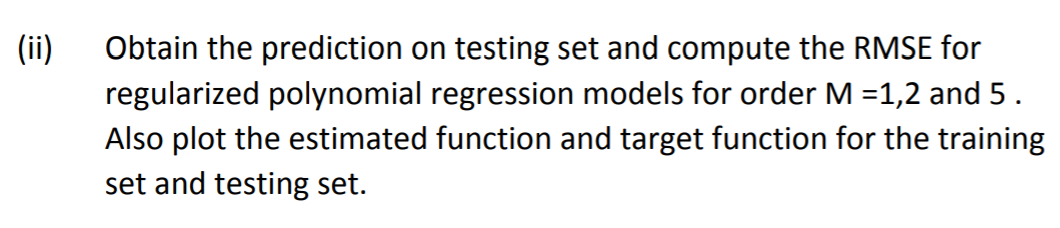